In [30]:
import os
import glob
import re
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
from scipy.signal import find_peaks
from scipy.integrate import trapz
from scipy.optimize import curve_fit as cf
from sklearn.neighbors import LocalOutlierFactor
lineal = lambda x,a,b : a*x+b
from scipy.integrate import simps
import matplotlib.pyplot as plt
import matplotlib as mpl

In [31]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [32]:
directorio = '/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/files/3minog'
patron = '*.csv'
archivos_csv = glob.glob(os.path.join(directorio, patron))
nombres_archivos= [os.path.basename(archivo) for archivo in archivos_csv]
tiempo_no=[]
for i in range(len(nombres_archivos)):
    resultado=float(re.search(r'(\d+\.\d+)',nombres_archivos[i]).group(1))
    tiempo_no.append(resultado)
tiempo=np.array(sorted(tiempo_no))

In [33]:
def V_0(i):
    df = pd.read_csv(f'{directorio}/{tiempo[i]}.csv')
    V_0=df.iloc[:, 0]
    return V_0
def V_h(i):
    df = pd.read_csv(f'{directorio}/{tiempo[i]}.csv')
    V_h=np.array(df['V_H'])
    return V_h
def V_bnint(i):
    df = pd.read_csv(f'{directorio}/{tiempo[i]}.csv')
    V_bnint=np.array(df['V_Bnint'])
    return V_bnint
def V_b(i):
    df = pd.read_csv(f'{directorio}/{tiempo[i]}.csv')
    V_b=np.array(df['V_B'])
    return V_b
def V_PT(i):    #resistencia
    df = pd.read_csv(f'{directorio}/{tiempo[i]}.csv')
    V_PT=np.array(df['V_pt'])
    return V_PT
def V_PR(i): #prueba
    df = pd.read_csv(f'{directorio}/{tiempo[i]}.csv')
    V_PR=np.array(df['V_pr'])
    return V_PR
def temp(i):
    pars,cov= cf(lineal,V_PT(i)/900,V_PR(i))
    return (pars[0]-100)/0.385 + 273.15


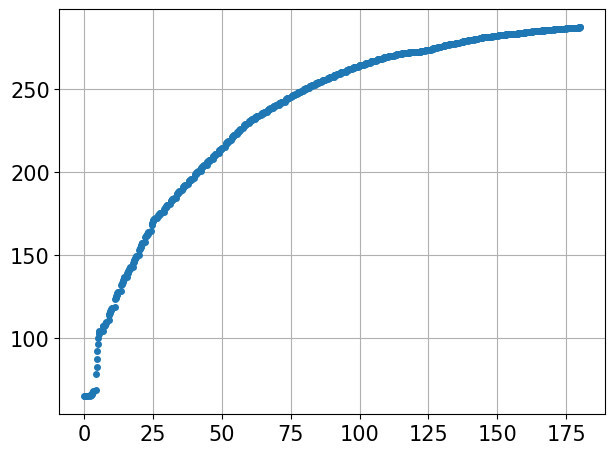

In [34]:
temperaturas_list=[]
for i in range(len(tiempo)):
    temperaturas_list.append(temp(i))
temperaturas=np.array(temperaturas_list)
plt.scatter(tiempo,temperaturas)
plt.grid()

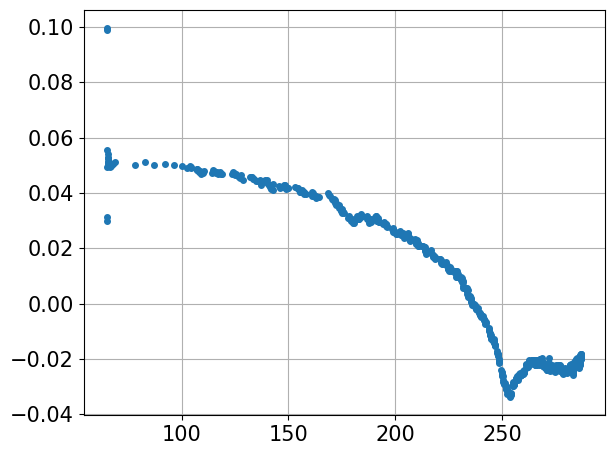

In [35]:
mag_l=[]
for i in range(len(tiempo)):
    mag_l.append(max(V_b(i)))
mag_l
mag=np.array(mag_l)
plt.scatter(temperaturas,mag)
plt.grid()

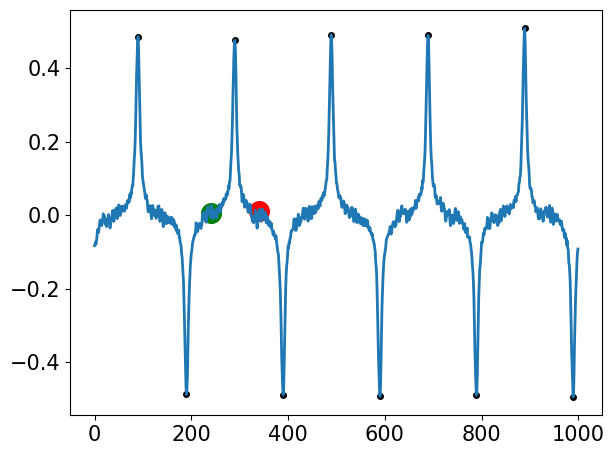

In [36]:
a=1
p_max=find_peaks(V_bnint(a), height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)[0]
p_min=find_peaks(-V_bnint(a), height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)[0]
b=round(p_max[1]+abs((p_max[1]-p_min[1])/2))
c=round(p_max[1]-abs((p_max[1]-p_min[1])/2))
for i in range(len(p_max)):
    plt.scatter(V_0(a)[p_max[i]],V_bnint(a)[p_max[i]],color="black")
    plt.scatter(V_0(a)[p_min[i]],V_bnint(a)[p_min[i]],color="black")
plt.plot(V_0(a),V_bnint(a))
plt.scatter(V_0(a)[b],V_bnint(a)[b],color="red",s=200)
plt.scatter(V_0(a)[c],V_bnint(a)[c],color="green",s=200)

In [44]:
def int(a):
    try:
        p_max=find_peaks(V_bnint(a), height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)[0]
        p_min=find_peaks(-V_bnint(a), height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)[0]
        b=round(p_max[1]+abs((p_max[1]-p_min[1])/2))
        c=round(p_max[1]-abs((p_max[1]-p_min[1])/2))

        tiempo_personalizado = V_0(a)[c:b]  # Ejemplo de datos de tiempo
        senal = V_bnint(a)[c:b]   # Ejemplo de datos de señal
    
    # Integración numérica usando el método del trapecio
        integral = simps(senal, x=tiempo_personalizado)
    except:
        integral=0
    # Crear un nuevo arreglo de tiempo para la integral
    
    # Calcular los valores de la integral para cada punto de tiempo
    return integral


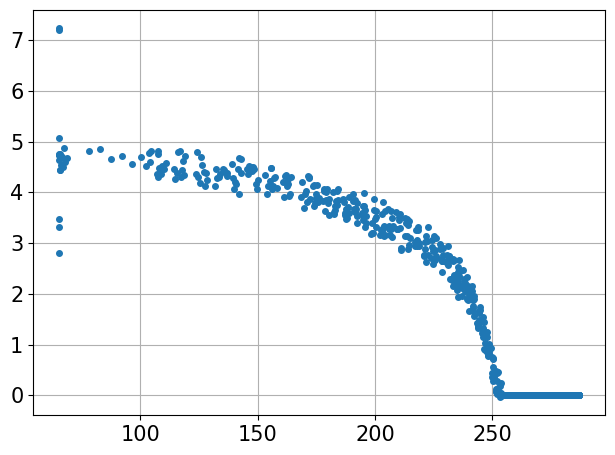

In [45]:
mag_int=[]
for i in range(len(temperaturas)):
    mag_int.append(int(i))
mag_in=np.array(mag_int)
plt.scatter(temperaturas,mag_in)
plt.grid()

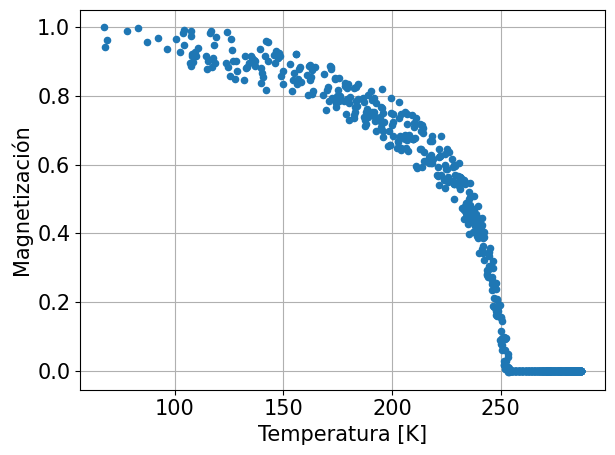

In [46]:
X = temperaturas.reshape(-1, 1)
y = mag_in

# Ajusta el modelo LOF
clf = LocalOutlierFactor(n_neighbors=70)
y_pred = clf.fit_predict(X)

# Filtra los puntos anómalos
X_filtered = X[y_pred == 1].reshape(-1)
y_filtered = y[y_pred == 1]


# Visualiza los datos filtrados
plt.scatter(X_filtered, y_filtered/max(y_filtered),s=20)
plt.ylabel('Magnetización')
plt.xlabel('Temperatura [K]')
plt.grid()
plt.savefig('Mag datos integrados')
plt.show()

**Computacional**

In [279]:
def abrir(i):
    return pd.read_csv(f'/home/luciano/Escritorio/Labo 4/1 - Ferromagnetismo/M_{i}.csv')    

df=[]  
for i in range(1,5):
    dfi=abrir(i)
    df.append(dfi)
df= pd.concat(df, ignore_index=False).sort_values(by='T').query('T <= 3').query('T>=0.5')


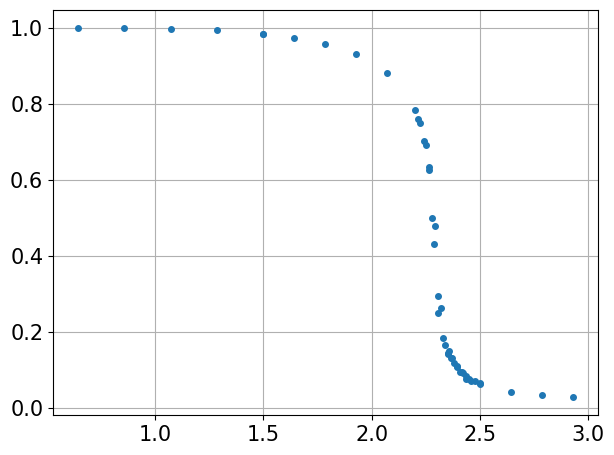

In [280]:
plt.scatter(df['T'],df['M'])
plt.grid()

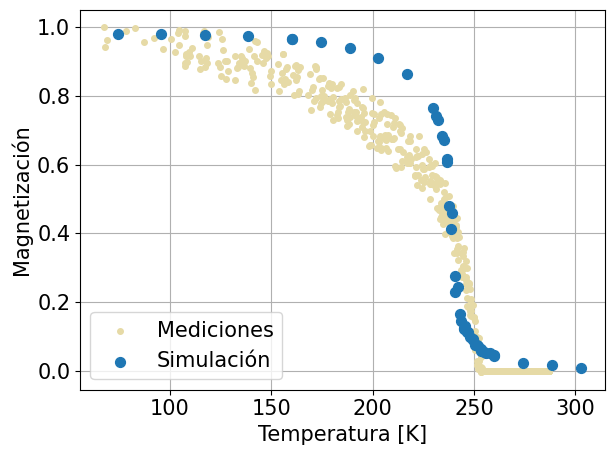

In [284]:
plt.scatter(X_filtered, y_filtered/max(y_filtered), c='#E6DAA6', alpha=1,label='Mediciones')
plt.scatter(df['T']*100+10,df['M']/max(df['M'])-0.02,s=50,label='Simulación')
plt.grid()
plt.legend()
plt.ylabel('Magnetización')
plt.xlabel('Temperatura [K]')
plt.savefig('Mediciones y simulación')
plt.show()

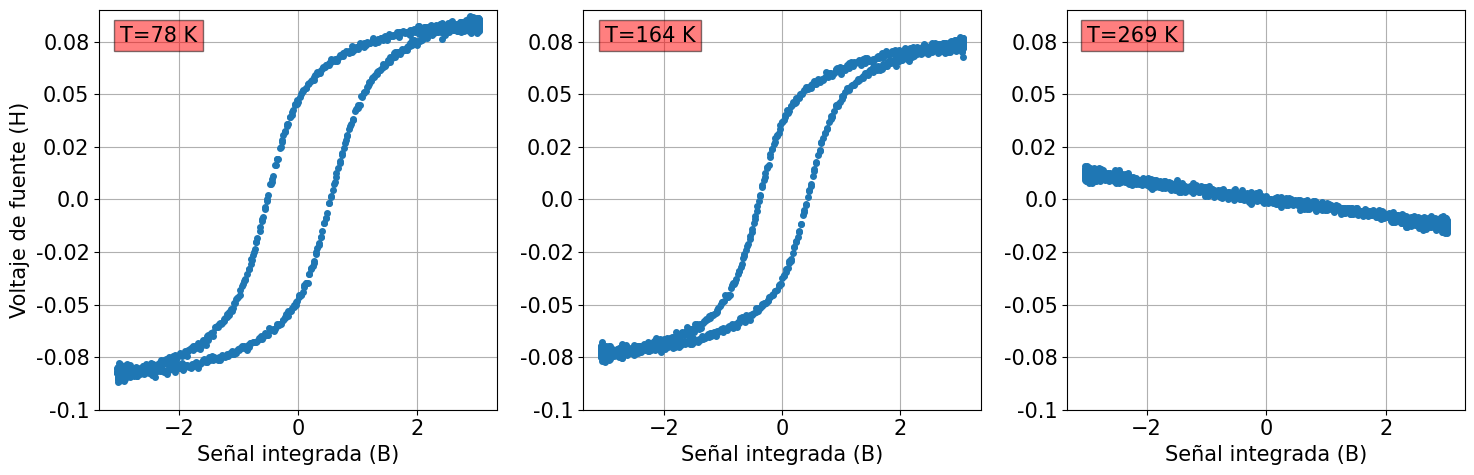

In [56]:
# Función para redondear los números a dos decimales
def round_tick(value, pos):
    return round(value, 2)

# Suponiendo que V_h(i) y V_b(i) están definidos en otro lugar

# Crear una sola figura y tres subgráficos en horizontal
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in zip([20, 110, 500], axs):
    ax.scatter(V_h(i), V_b(i) - (max(V_b(i))+min(V_b(i)))/2)
    ax.grid()
    ax.set_ylim(-0.1, 0.09)
    ax.set_xlabel('Señal integrada (B)')
    ax.yaxis.set_major_formatter(FuncFormatter(round_tick))
    ax.text(-3, 0.075, f"T={round(temperaturas[i])} K", fontsize=15, bbox=dict(facecolor='red', alpha=0.5))

# Establecer ylabel solo para el primer gráfico
axs[0].set_ylabel('Voltaje de fuente (H)')

plt.tight_layout()  # Ajustar el espaciado entre los subgráficos
plt.savefig("graficos_en_horizontal.png")  # Guardar la figura como imagen
plt.show()



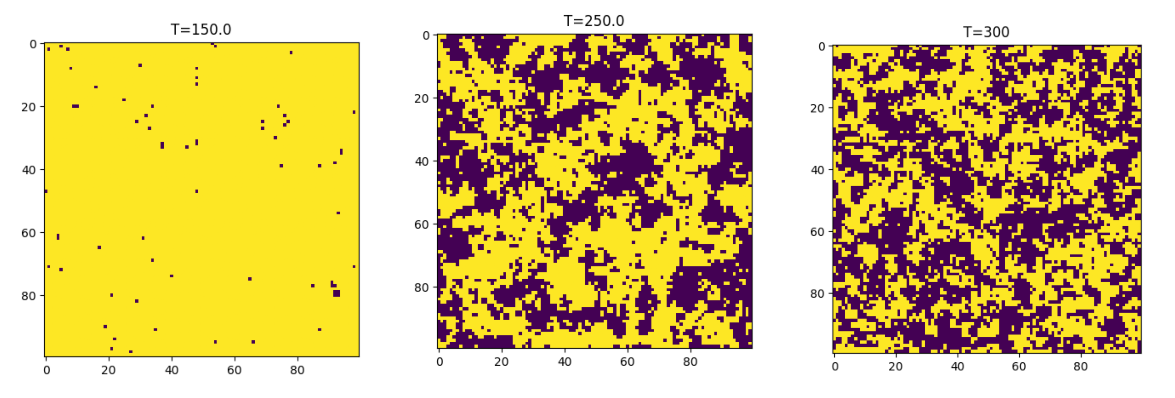

In [43]:
from matplotlib import image

# Carga las imágenes
img1 = image.imread('T=150.0.png')
img2 = image.imread('T=250.0.png')
img3 = image.imread('T=300.png')
# Crea una figura con 1 fila y 3 columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))

# Oculta los ejes y los títulos
for ax in axes:
    ax.axis('off')

# Muestra cada imagen en un eje diferente
axes[0].imshow(img1)
axes[2].imshow(img2)
axes[1].imshow(img3)
# plt.subplots_adjust(wspace=-0.5, hspace=1)
# Ajusta los márgenes para evitar superposiciones
plt.tight_layout()

# Guarda la figura como una imagen
plt.savefig('imagen_completa.png')

# Muestra la figura
plt.show()